# Author: Lauro Cesar Ribeiro

## Step 1: Installation and Setup

In [1]:
# Installing TensorFlow
#! pip install -q tensorflow-gpu

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.4.1


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

# Step 2: Data Preprocessing

In [69]:
from sklearn import datasets, metrics

In [70]:
# import the dataset
cancer = datasets.load_breast_cancer()

In [71]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [72]:
# matrix of features
x = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)

In [73]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
# dependent variable
y = cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [75]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [77]:
x.shape, y.shape

((569, 30), (569,))

In [14]:
# splitting the dataset in train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [16]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [18]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [19]:
x_train = x_train.reshape(455, 30, 1)
x_test = x_test.reshape(114, 30, 1)


In [20]:
x_train.shape, x_test.shape

((455, 30, 1), (114, 30, 1))

# Step 3: Building the model

In [21]:
# define an object
model = tf.keras.models.Sequential()

In [22]:
# First CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [23]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [24]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [25]:
# dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [27]:
# compile model

opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [28]:
history =  model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
15/15 [==============================] - 6s 177ms/step - loss: 0.8973 - accuracy: 0.6141 - val_loss: 0.6358 - val_accuracy: 0.6140
Epoch 2/50
15/15 [==============================] - 0s 20ms/step - loss: 0.4762 - accuracy: 0.7728 - val_loss: 0.6011 - val_accuracy: 0.7807
Epoch 3/50
15/15 [==============================] - 0s 13ms/step - loss: 0.3365 - accuracy: 0.8498 - val_loss: 0.5712 - val_accuracy: 0.8333
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.2172 - accuracy: 0.9296 - val_loss: 0.5471 - val_accuracy: 0.8772
Epoch 5/50
15/15 [==============================] - 0s 13ms/step - loss: 0.2205 - accuracy: 0.9004 - val_loss: 0.5230 - val_accuracy: 0.8772
Epoch 6/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1935 - accuracy: 0.9094 - val_loss: 0.4977 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1494 - accuracy: 0.9380 - val_loss: 0.4732 - val_accuracy: 0.9298
Epoch 8/50
1

# Step 5: Model Prediction

In [29]:
y_pred = model.predict_classes(x_test)

In [30]:
print(y_pred[12]), print(y_test[12])

[1]
1


(None, None)

In [31]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [32]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[45  2]
 [ 1 66]]


In [33]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9736842105263158


# Stpe 6: Learning curve

In [34]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

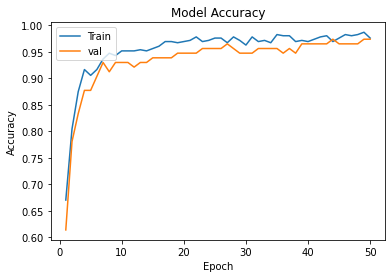

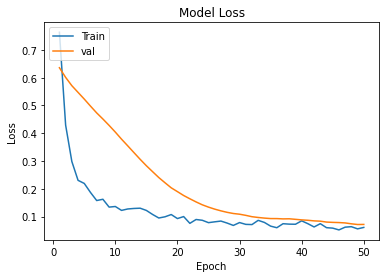

In [35]:
learning_curve(history, 50)

In [78]:
# Make class predictions with the model
predictions = model.predict_classes(x_test)


for i in range(20):
    if predictions[i] == y_test[i]:
        print("Prediction is Correct")
    else:
        print('\033[1m' + "*** Predicted Wrong ***" + '\033[0m')
    print("Predicted:",predictions[i], "Expected => \n",y_test[i])

Prediction is Correct
Predicted: [0] Expected => 
 0
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
*** Predicted Wrong ***
Predicted: [0] Expected => 
 1
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [0] Expected => 
 0
Prediction is Correct
Predicted: [1] Expected => 
 1
Prediction is Correct
Predicted: [0] Expected => 
 0
Prediction is Correct
Predicted: [0] Expecte